¡Hola,César!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola César! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# Proyecto Integrado

## 2.-Prepar los datos

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [58]:
ruta = '/datasets/games.csv'
df = pd.read_csv(ruta)
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

### Convertir los nombres de las columnas en mínusculas

In [59]:
nuevos_nombres_columnas = []
for column in df.columns:
    nombre_min = column.lower()
    nuevos_nombres_columnas.append(nombre_min)
nuevos_nombres_columnas

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [60]:
df.columns = nuevos_nombres_columnas
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Convertir los datos en sus tipos correspondientes

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [62]:
df.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Hay valores ausentes en la columna de year_of_release porque posiblemente no se registraron bien los datos y en las columnas de critic_score y user_score porque probablemente no han recibido una critica.

In [63]:
# transforme el termino tbd por un 0 para poder hacer mejor el análisis
df['user_score']=df['user_score'].replace('tbd',0)

In [64]:
# transforme todos los valores NaN a 0 para poder cambiar el tipo de dato
columna_nan = ['critic_score','user_score']
for column in columna_nan:
    df[column].fillna(0,inplace=True)
df.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.0,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96.0,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,0.0,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,9125.0,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,33.574035,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,35.818235,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,0.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,70.000000,NaN,NaN


In [65]:
# Cambie user_score a float para tomar en cuenta los decimales
df['user_score']=df['user_score'].astype('float')

In [66]:
# Voy a transformar lo valores faltantes de la columna year_of_release en el año promedio de la vida de la plataforma
df['year_of_release']=pd.to_numeric(df['year_of_release'],errors='coerce')

In [67]:
año_promedio_plataforma=df.groupby('platform')['year_of_release'].mean()
año_promedio_plataforma

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.126953
DC      1999.942308
DS      2008.185290
GB      1995.958763
GBA     2003.210851
GC      2003.400369
GEN     1993.034483
GG      1992.000000
N64     1998.531646
NES     1987.153061
NG      1994.500000
PC      2008.914316
PCFX    1996.000000
PS      1998.005882
PS2     2004.583921
PS3     2010.840735
PS4     2015.145408
PSP     2008.731769
PSV     2014.132867
SAT     1996.028902
SCD     1993.833333
SNES    1993.845188
TG16    1995.000000
WS      2000.000000
Wii     2008.966563
WiiU    2013.659864
X360    2009.880682
XB      2003.636364
XOne    2014.951417
Name: year_of_release, dtype: float64

In [68]:
def poner_año(fila):
    if pd.isna(fila['year_of_release']):
        return año_promedio_plataforma.get(fila['platform'], np.nan)
    return fila['year_of_release']

In [69]:
df['year_of_release'] = df.apply(poner_año, axis=1).round(0).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 3.- Analiza los datos

### Calculo de las ventas totales

In [70]:
df['ventas_totales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



### Cuantos juegos fueron lanzados por año

In [71]:
df.groupby('year_of_release')['platform'].count()

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     264
1997     289
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1493
2010    1285
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: platform, dtype: int64

<AxesSubplot:title={'center':'Número de juegos por año'}, xlabel='year_of_release'>

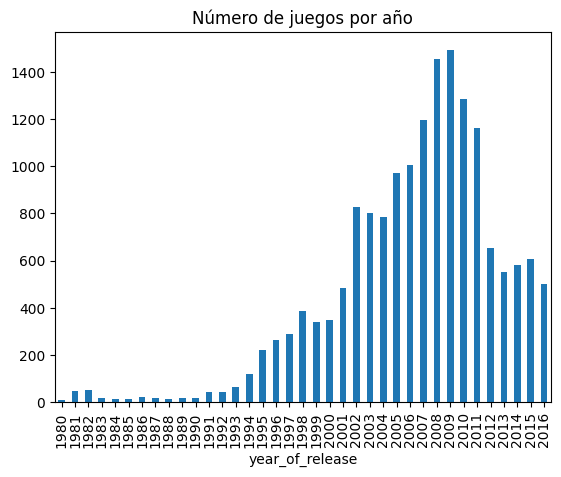

In [72]:
df.groupby('year_of_release')['platform'].count().plot(kind='bar',title='Número de juegos por año')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



Se ve el crecimiento y el decremento de la industria en los datos que tenemos, podemos ver que en la primera decada del siglo hay un crecimiento importante seguido por una caida.

### Mayores ventas por plataforma con su distribución por año y el tiempo de vida de cada plataforma

In [73]:
top_ventas=df.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index(name='ventas')
top_ventas.head()

,platform,ventas
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


<AxesSubplot:title={'center':'Ventas por año de la PS2'}, xlabel='year_of_release'>

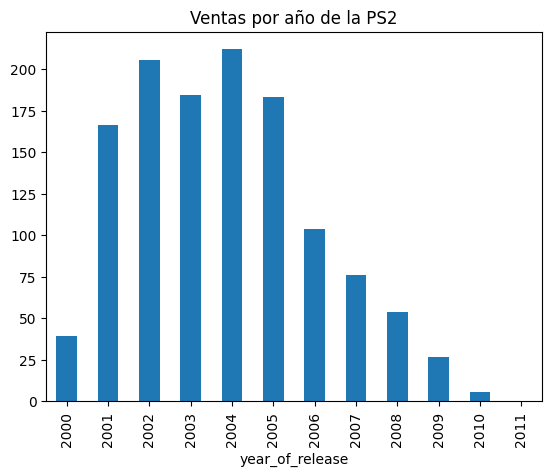

In [74]:
#PS2
df[df['platform']=='PS2'].groupby('year_of_release')['ventas_totales'].sum().plot(kind='bar',title='Ventas por año de la PS2')

<AxesSubplot:title={'center':'Ventas por año de la X360'}, xlabel='year_of_release'>

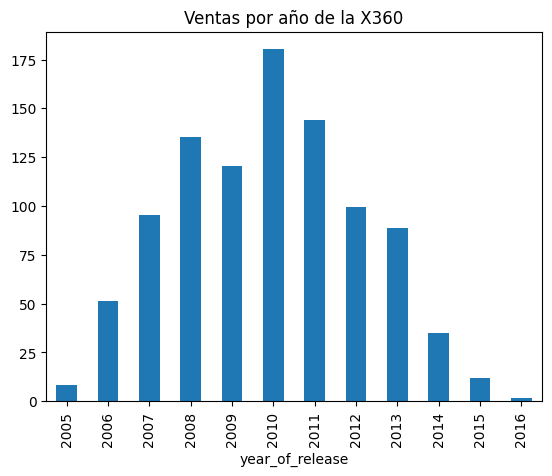

In [75]:
#X360
df[df['platform']=='X360'].groupby('year_of_release')['ventas_totales'].sum().plot(kind='bar',title='Ventas por año de la X360')

<AxesSubplot:title={'center':'Ventas por año de la PS3'}, xlabel='year_of_release'>

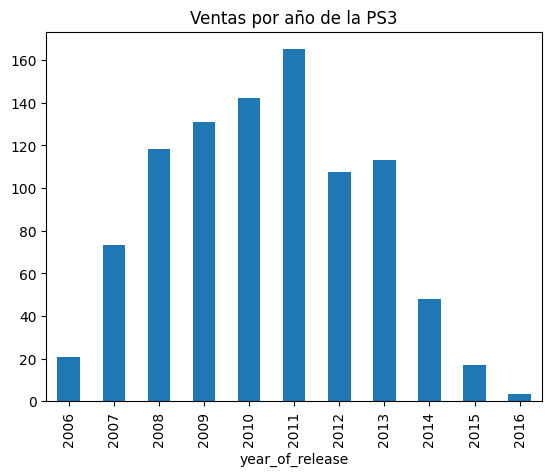

In [76]:
#PS3
df[df['platform']=='PS3'].groupby('year_of_release')['ventas_totales'].sum().plot(kind='bar',title='Ventas por año de la PS3')

<AxesSubplot:title={'center':'Ventas por año de la Wii'}, xlabel='year_of_release'>

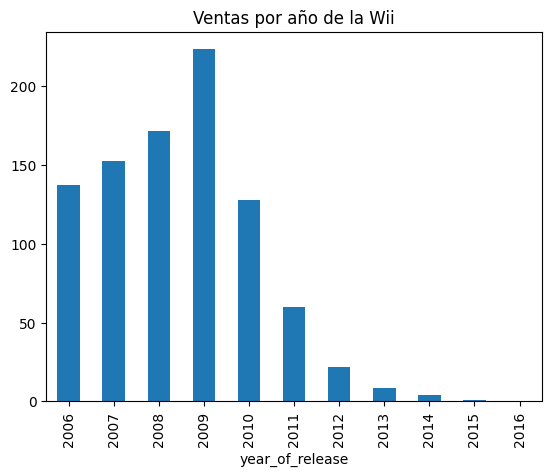

In [77]:
#Wii
df[df['platform']=='Wii'].groupby('year_of_release')['ventas_totales'].sum().plot(kind='bar',title='Ventas por año de la Wii')

<AxesSubplot:title={'center':'Ventas por año de la DS'}, xlabel='year_of_release'>

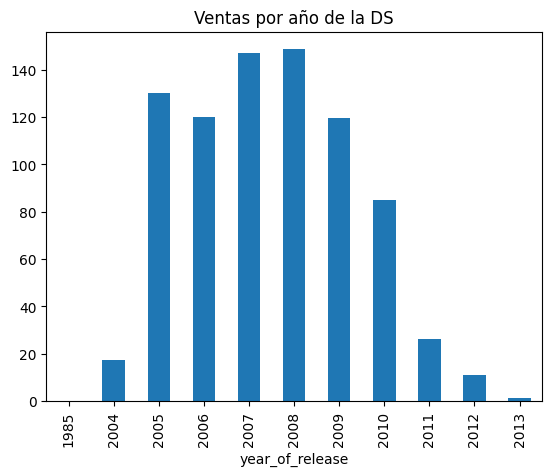

In [78]:
#Hubo un error con esta porque el DS no exitía en 1985
df[df['platform']=='DS'].groupby('year_of_release')['ventas_totales'].sum().plot(kind='bar',title='Ventas por año de la DS')

In [79]:
df[(df['platform']=='DS') & (df['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,0.0,NaN,0.02


In [80]:
#Le puse el promedio que había obtenido anteriormente
df.at[15957,'year_of_release']=2008

In [81]:
df[(df['platform']=='DS') & (df['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales


<AxesSubplot:title={'center':'Ventas por año de la DS'}, xlabel='year_of_release'>

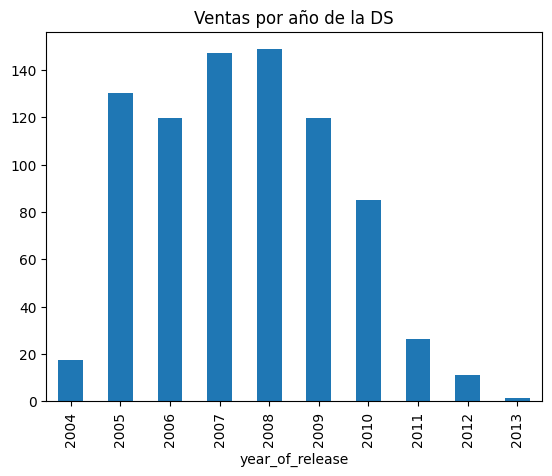

In [82]:
#DS gráfica correcta
df[df['platform']=='DS'].groupby('year_of_release')['ventas_totales'].sum().plot(kind='bar',title='Ventas por año de la DS')

In [83]:
duracion_plataforma=df.groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
duracion_plataforma['duracion']=duracion_plataforma['max']-duracion_plataforma['min']
print(duracion_plataforma)
print()
print('La duración promedio de una plataforma es:',duracion_plataforma['duracion'].mean())

   platform   min   max  duracion
0      2600  1980  1989         9
1       3DO  1994  1995         1
2       3DS  2011  2016         5
3        DC  1998  2008        10
4        DS  2004  2013         9
5        GB  1988  2001        13
6       GBA  2000  2007         7
7        GC  2001  2007         6
8       GEN  1990  1994         4
9        GG  1992  1992         0
10      N64  1996  2002         6
11      NES  1983  1994        11
12       NG  1993  1996         3
13       PC  1985  2016        31
14     PCFX  1996  1996         0
15       PS  1994  2003         9
16      PS2  2000  2011        11
17      PS3  2006  2016        10
18      PS4  2013  2016         3
19      PSP  2004  2015        11
20      PSV  2011  2016         5
21      SAT  1994  1999         5
22      SCD  1993  1994         1
23     SNES  1990  1999         9
24     TG16  1995  1995         0
25       WS  1999  2001         2
26      Wii  2006  2016        10
27     WiiU  2012  2016         4
28     X360  2

La duración promedio de las plataformas es de 7 años aunque esta duración contempla a la PC como una plataforma y no debería porque todos los juegos se desarrollan en una PC y no van a tener fin los juegos de PC. Voy a hacer un segundo calculo para quitar este dato.

In [84]:
print('La duración promedio sin PC o PCFX es:',duracion_plataforma[(duracion_plataforma['platform']!='PC')|(duracion_plataforma['platform']!='PCFX')]['duracion'].mean())

La duración promedio sin PC o PCFX es: 7.0


Obtuvimos el mismo resultado, la vida promedio de una plataforma es de 7 años.

### Plataformas vigentes

In [85]:
top_ventas_duracion=pd.merge(top_ventas,duracion_plataforma,on='platform')
top_ventas_duracion

,platform,ventas,min,max,duracion
0,PS2,1255.77,2000,2011,11
1,X360,971.42,2005,2016,11
2,PS3,939.65,2006,2016,10
3,Wii,907.51,2006,2016,10
4,DS,806.12,2004,2013,9
5,PS,730.86,1994,2003,9
6,GBA,317.85,2000,2007,7
7,PS4,314.14,2013,2016,3
8,PSP,294.05,2004,2015,11
9,PC,259.52,1985,2016,31


In [86]:
# Tomando en cuenta que la vida promedio de una plataforma es de 7 años
top_ventas_duracion[(top_ventas_duracion['min'] > 2009)&(top_ventas_duracion['max']<=2016)].sort_values(by=['ventas','duracion'],ascending=False)

,platform,ventas,min,max,duracion
7,PS4,314.14,2013,2016,3
10,3DS,259.00,2011,2016,5
17,XOne,159.32,2013,2016,3
19,WiiU,82.19,2012,2016,4
20,PSV,54.07,2011,2016,5


Todas estas plataformas les quedan algunos años de vida aunque es probable que las ventas del 3DS y PSV vayan en declive.

### Ventas globales de juegos

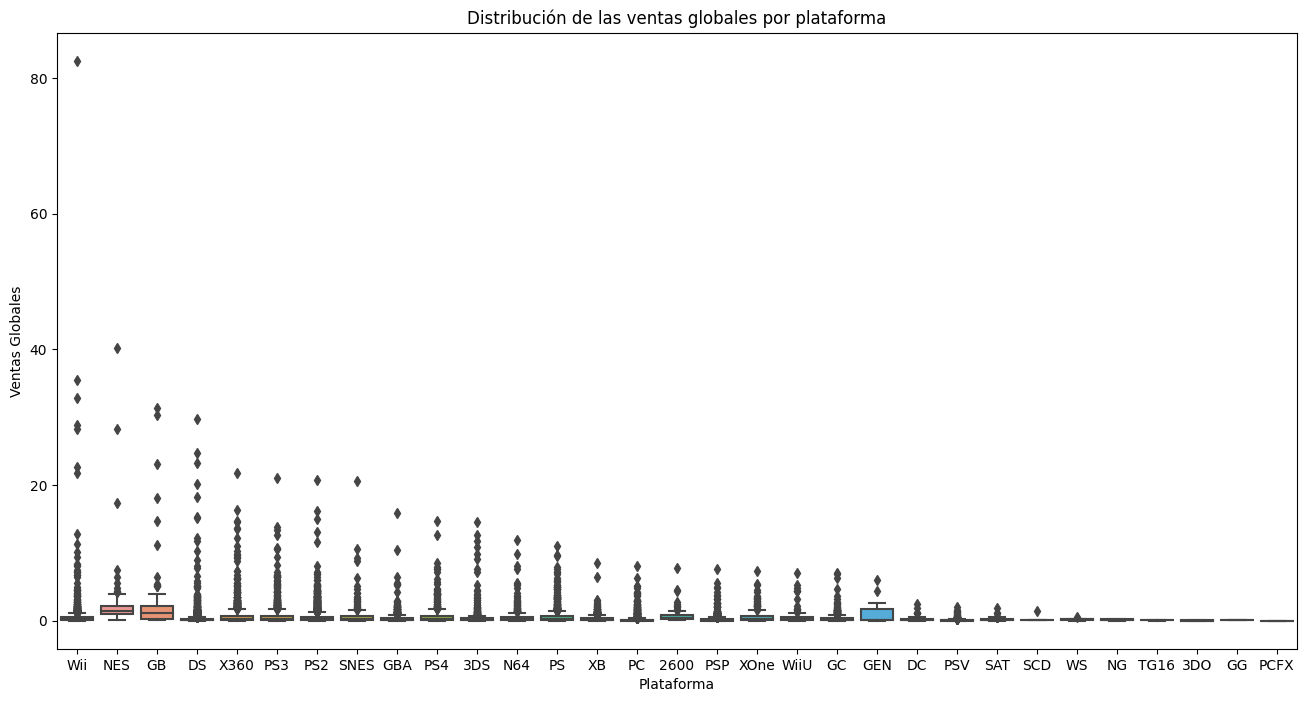

In [87]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x='platform',y='ventas_totales')
plt.title('Distribución de las ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

EN promedio las ventas globales por consolas son parecedias excepto por las primeras 5 que tienen ventas excepcionales.

### Efecto de las reseñas de los usuarios y criticos en las ventas del Wii

In [88]:
wii_df = df[df['platform']=='Wii'].copy()

Text(0, 0.5, 'Ventas Globales')

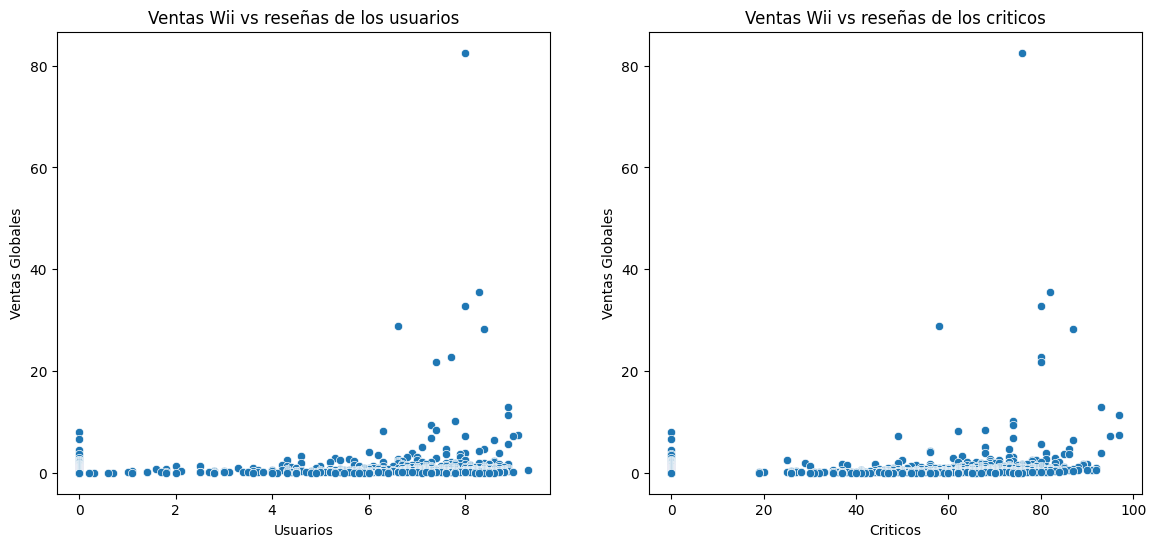

In [89]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=wii_df,x='user_score',y='ventas_totales')
plt.title('Ventas Wii vs reseñas de los usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Ventas Globales')
plt.subplot(1,2,2)
sns.scatterplot(data=wii_df,x='critic_score',y='ventas_totales')
plt.title('Ventas Wii vs reseñas de los criticos')
plt.xlabel('Criticos')
plt.ylabel('Ventas Globales')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

In [90]:
usuarios=wii_df['user_score'].corr(wii_df['ventas_totales'])
criticos=wii_df['critic_score'].corr(wii_df['ventas_totales'])
print(f'La correlación de las ventas globales con las reseñas de los usuario es:{usuarios:.4f}')
print(f'La correlación de las ventas globales con las reseñas de los críticos es:{criticos:.4f}')

La correlación de las ventas globales con las reseñas de los usuario es:0.1861
La correlación de las ventas globales con las reseñas de los críticos es:0.1895


Las correlaciones son parecidas entre usuarios y criticos, la correlacion es muy poca entre las ventas globales y las reseñas de los criticos y los usuarios lo que podria significar que en realidad las reseñas no afectan las ventas de los juegos.

### Venta de juegos en otras plataforma

In [91]:
# Juegos que son multiplataforma
multiplataforma=df.groupby('name')['platform'].nunique()
juegos_multiplataforma=multiplataforma[multiplataforma>1].index
multi_df=df[df['name'].isin(juegos_multiplataforma)].copy()
multi_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN,30.26
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0.0,0.0,NaN,20.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,0.0,0.0,T,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01


In [92]:
juegos_wii=multi_df[multi_df['platform']=='Wii']['name'].unique()
juegos_wii_multi=multi_df[multi_df['name'].isin(juegos_wii)].copy()
juegos_wii_multi

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,10.12
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008,Puzzle,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16592,Who Wants to be a Millionaire: 2nd Edition,DS,2008,Misc,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01
16636,Deal or No Deal,PC,2006,Misc,0.00,0.01,0.00,0.00,0.0,7.5,E,0.01
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01


In [93]:
ventas_juegos_wii_multi=juegos_wii_multi.groupby(['name','platform'])['ventas_totales'].sum().reset_index().sort_values(by='ventas_totales',ascending=False)
ventas_juegos_wii_multi.head(10)

,name,platform,ventas_totales
307,Call of Duty: Modern Warfare 3,X360,14.73
303,Call of Duty: Black Ops,X360,14.62
305,Call of Duty: Modern Warfare 3,PS3,13.33
301,Call of Duty: Black Ops,PS3,12.63
926,Just Dance 3,Wii,10.12
608,FIFA Soccer 13,PS3,8.17
2053,The Sims 3,PC,8.01
1162,Mario & Sonic at the Olympic Games,Wii,8.00
312,Call of Duty: World at War,X360,7.38
2005,The Legend of Zelda: Twilight Princess,Wii,7.16


Text(0, 0.5, 'Ventas Globales')

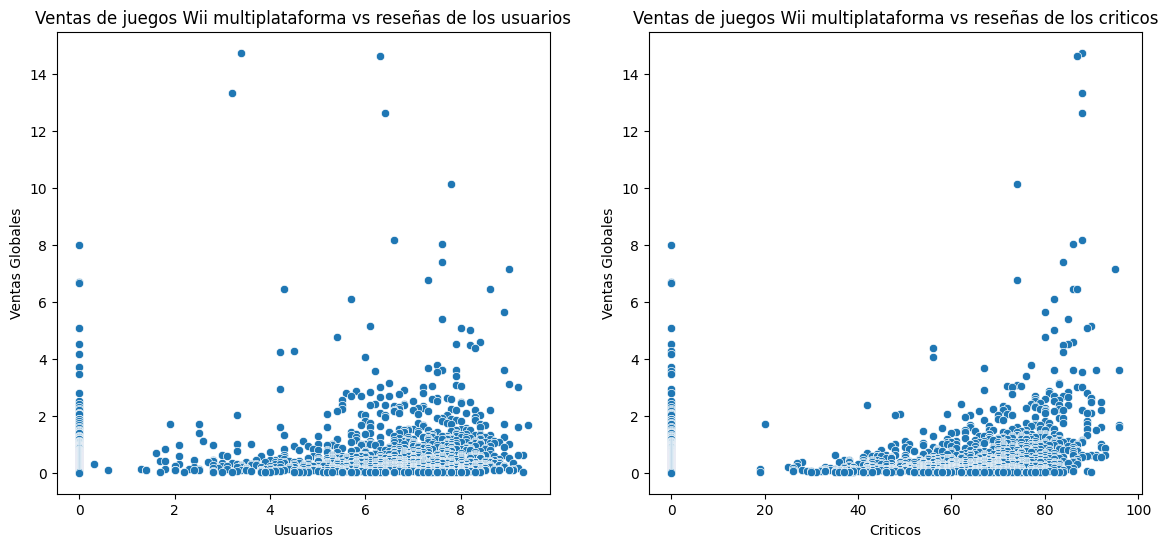

In [94]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=juegos_wii_multi,x='user_score',y='ventas_totales')
plt.title('Ventas de juegos Wii multiplataforma vs reseñas de los usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Ventas Globales')
plt.subplot(1,2,2)
sns.scatterplot(data=juegos_wii_multi,x='critic_score',y='ventas_totales')
plt.title('Ventas de juegos Wii multiplataforma vs reseñas de los criticos')
plt.xlabel('Criticos')
plt.ylabel('Ventas Globales')

In [95]:
usuarios_multi=juegos_wii_multi['user_score'].corr(juegos_wii_multi['ventas_totales'])
criticos_multi=juegos_wii_multi['critic_score'].corr(juegos_wii_multi['ventas_totales'])
print(f'La correlación de las ventas globales con las reseñas de los usuario es:{usuarios:.4f}')
print(f'La correlación de las ventas globales con las reseñas de los críticos es:{criticos:.4f}')

La correlación de las ventas globales con las reseñas de los usuario es:0.1861
La correlación de las ventas globales con las reseñas de los críticos es:0.1895


Hay mayores ventas de los juegos multiplataforma pero aún se mantiene la misma relación ya que solo es una muestra de todos los juegos de wii.

### Distrubición de juegos por género

In [96]:
df.groupby('genre')['ventas_totales'].sum().sort_values(ascending=False)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: ventas_totales, dtype: float64

<AxesSubplot:title={'center':'Distribución de ganacias de juegos por género'}, xlabel='Género', ylabel='Ganacias'>

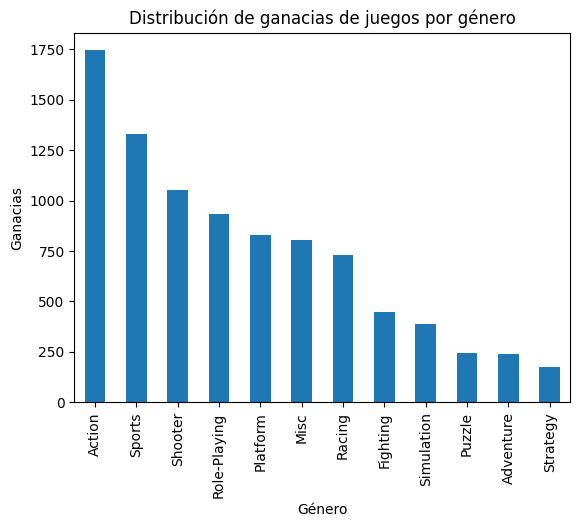

In [97]:
df.groupby('genre')['ventas_totales'].sum().sort_values(ascending=False).plot(kind='bar',title='Distribución de ganacias de juegos por género',xlabel='Género',ylabel='Ganacias')

Yo diría que los juegos más rentables son los que se pueden jugar entre multiples personas. No creo que se pueda generalizar por cada uno de los generos deben tener algunos juegos con ventas superiores pero la tendencia es notable.

### Perfiles por región

In [98]:
norteamericano=df.drop(['eu_sales','jp_sales','other_sales'],axis=1)
norteamericano

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.0,0.0,NaN,0.01


In [99]:
europeo=df.drop(['na_sales','jp_sales','other_sales'],axis=1)
europeo

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,28.96,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,3.58,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,12.76,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,10.93,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,8.89,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.01,0.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.00,0.0,0.0,NaN,0.01


In [100]:
japones=df.drop(['na_sales','eu_sales','other_sales'],axis=1)
japones

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,3.77,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,6.81,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,3.79,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,3.28,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,10.22,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,0.0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,0.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.00,0.0,0.0,NaN,0.01


#### Plataformas principales por región

In [101]:
na_ventas_plataforma=norteamericano.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_ventas_plataforma.head()

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [102]:
eu_ventas_plataforma=europeo.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_ventas_plataforma.head()

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [103]:
jp_ventas_plataforma=japones.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_ventas_plataforma.head()

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Las mayores ventas las tiene norteamérica con las consolas recientes, esto es gracias a que el mercado norteamericano es mucho mas grande que el europeo y el japonés.

#### Generos principales por región

In [104]:
na_top_generos=norteamericano.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_top_generos.head()

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [105]:
eu_top_generos=europeo.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_top_generos.head()

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [106]:
jp_top_generos=japones.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_top_generos.head()

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Las ventas por género son casi las mismas en Europa y Norteamérica pero son distintas en Japón, quizá se deba a diferencias culturales.

#### Clasificación ESRB por región

In [107]:
na_clasificacion=norteamericano.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_clasificacion.head()

rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

In [108]:
eu_clasificacion=europeo.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_clasificacion.head()

rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

In [109]:
jp_clasificacion=japones.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_clasificacion.head()

rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64

Las clasificaiones no afectan las ventas al parecer y son muy parecidas entre las regiones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

### Pruebas de hipótesis

#### Prueba sobre las calificaciones promedio entre Xbox One y PC

In [124]:
xbox_reseñas_usuarios=df[df['platform']=='XOne']['user_score']
xbox_reseñas_usuarios

99       0.0
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    0.0
16660    6.7
16672    0.0
Name: user_score, Length: 247, dtype: float64

In [123]:
pc_reseñas_usuarios=df[df['platform']=='PC']['user_score']
pc_reseñas_usuarios

85       7.6
138      7.3
192      4.0
195      0.0
218      8.2
        ... 
16690    0.0
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64

In [119]:
alpha=.05

In [120]:
#Prueba de Levene
stat, p=st.levene(xbox_reseñas_usuarios,pc_reseñas_usuarios)
print(f'Estadístico de Levene: {stat:.3f}')
print(f'Valor p: {p:.3f}')
if p < 0.05:
    print("Rechazamos la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se rechaza la hipótesis nula: las varianzas pueden considerarse iguales.")

Estadístico de Levene: 0.024
Valor p: 0.877
No se rechaza la hipótesis nula: las varianzas pueden considerarse iguales.


La hipotesis nula es:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

La hipótesis alternativa es:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

In [122]:
# Prueba de Hipótesis
results1=st.ttest_ind(xbox_reseñas_usuarios,pc_reseñas_usuarios,equal_var=True)
print('valor p:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.0005833414469972175
Rechazamos la hipótesis nula


Como rechazamos la hipótesis nula decimos que los promedio de las reseñas de los usuarios son distintos.

#### Prueba sobre las calificaciones de los usuarios para los géneros de Acción y Deportes.

In [125]:
reseñas_usuarios_accion=df[df['genre']=='Action']['user_score']
reseñas_usuarios_accion

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16692    7.6
16694    0.0
16695    0.0
16699    0.0
16710    0.0
Name: user_score, Length: 3369, dtype: float64

In [130]:
reseñas_usuarios_deportes=df[df['genre']=='Sports']['user_score']
reseñas_usuarios_deportes

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    0.0
16688    0.0
16693    0.0
16700    0.0
16711    0.0
Name: user_score, Length: 2348, dtype: float64

In [131]:
#Prueba de Levene
stat, p=st.levene(reseñas_usuarios_accion,reseñas_usuarios_deportes)
print(f'Estadístico de Levene: {stat:.3f}')
print(f'Valor p: {p:.3f}')
if p < 0.05:
    print("Rechazamos la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se rechaza la hipótesis nula: las varianzas pueden considerarse iguales.")

Estadístico de Levene: 12.041
Valor p: 0.001
Rechazamos la hipótesis nula: las varianzas son diferentes.


La hipotesis nula es:
- Las calificaciones promedio de los usuarios para género de Acción y Deportes son distintas.

La hipótesis alternativa es:
- Las calificaciones promedio de los usuarios para género de Acción y Deportes son las mismas.

In [134]:
# Prueba de Hipótesis
results2=st.ttest_ind(reseñas_usuarios_accion,reseñas_usuarios_deportes,equal_var=False)
print('valor p:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.1599167086071376e-08
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Gran trabajo con el desarrollo de las pruebas de hipótesis. Además, lo complementas con la prueba de levene para mostrar el supuesto de varianzas iguales. 

Como el valor p fue menor a el valor alfa podemos rechazar la hipótesis nula y decir que los promedios de las reseñas de los usuarios en cuanto a los géneros de Acción y Deportes son iguales.

### Conclusiones generales

Fue un trabajo largo y pesado pero he aprendido mucho con la práctica y la experimentación con el dataframe del proyecto. Ha crecido mi confianza para adentrarme a los datos y para obtener nuevos valores y caracteristicas. Quizá con mas columnas columnas del dataframe original y nuevos valores se pueda hacer un análisis mas completo pero con este proyecto entendí mucho sobre el dataframe.